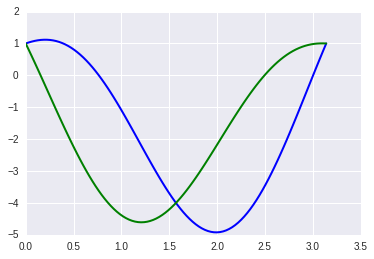

In [1]:
from __future__ import division

import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

# y'' +4y = -9sin(x), y(0) = 1., y(3*pi/4.) = -(1.+3*sqrt(2))/2., 
                                                # y'(0) = -2
# Exact Solution: y(x) = cos(2x) + (1/2)sin(2x) - 3sin(x)

def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 =  t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print "t not found"
    return t2

        
def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol


ode = lambda y,x : np.array([y[1], -4*y[0]-9*np.sin(x)])

X = np.linspace(0,np.pi,100)
Y1 = solveSecant(ode,X,0,np.pi,1,1,0,1,40)
Y2 = solveSecant(ode,X,0,np.pi,1,1,0,4,40)

plt.plot(X,Y1,'-b',linewidth=2)
plt.plot(X,Y2,'-g',linewidth=2)
plt.show()


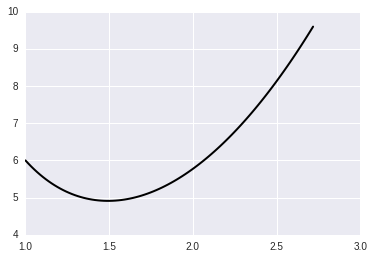

In [8]:
def newton_find_t(f,a,b,alpha,beta,t0,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol = odeint(f,np.array([alpha,t0,0,1]),[a,b],atol=1e-10)
        y = sol[1,0]
        z = sol[1,2]
        t1 =  t0 - (y - beta)/z
        t0 = t1
        i = i+1
    return t1

def solveNewton(f,X,a,b,alpha,beta,t0,maxI):
    t = newton_find_t(f,a,b,alpha,beta,t0,maxI)
    sol = odeint(f,np.array([alpha,t,0,1]), X,atol=1e-10)[:,0]
    return sol

ode = lambda y,x : np.array([y[1], 3 + 2*y[0]/(x**2), y[3], 2./(x**2)*y[2]])

X = np.linspace(1,np.e,100)
Y1 = solveNewton(ode,X,1,np.e,6,np.e**2 + 6/np.e,0,40)

plt.plot(X,Y1,'-k',linewidth=2)
plt.show()

/home/tanner/anaconda2/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


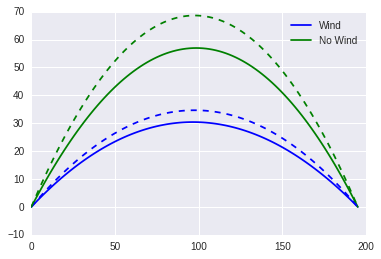

In [3]:
def find_t(f,a,b,alpha,beta,v,t0,t1,maxI):
    sol1 = -1
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,v,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,v,t1]), [a,b],atol=1e-10)[1,0]
        t2 =  t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print "t not found"
    return t2

        
def solveSecant(f,X,a,b,alpha,beta,v,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,v,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,v,t]), X, atol=1e-10)[:,0]
    return sol

g = 9.8067
mu = 0.0003

ode1 = lambda y,x : [np.tan(y[2]), 
                          -(g*np.sin(y[2]) + mu*y[1]**2)/(y[1]*np.cos(y[2])),
                          -g/(y[1]**2)]
ode2 = lambda y,x : [np.tan(y[2]), 
                          -g*np.sin(y[2])/(y[1]*np.cos(y[2])),
                          -g/(y[1]**2)]

X = np.linspace(0,195,100)
Y1 = solveSecant(ode1, X, 0, 195, 0, 0, 45, 1, 6, 40)
Y2 = solveSecant(ode1, X, 0, 195, 0, 0, 45, 0, 1, 40)

Y3 = solveSecant(ode2, X, 0, 195, 0, 0, 45, 1, 6, 40)
Y4 = solveSecant(ode2, X, 0, 195, 0, 0, 45, 0, 1, 40)


plt.plot(X,Y1,"b",label="Wind")
plt.plot(X,Y2,"g",label="No Wind")
plt.plot(X,Y3,"b--")
plt.plot(X,Y4,"g--")
plt.legend()
plt.show()